# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [27]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [28]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [29]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [32]:
list(app_train)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [54]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']].copy() # subset
age_data.loc[:,'YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age


In [55]:

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut =  10
age_data.loc[:,'YEARS_GRP'] = pd.qcut(age_data.loc[:,'YEARS_BIRTH'], 10) 

# 顯示不同組的數量
print(age_data['YEARS_GRP'].value_counts())
#age_data.head()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: YEARS_GRP, dtype: int64


In [58]:
age_data.groupby('YEARS_GRP').describe()

TARGET                                               \
                    count      mean       std  min  25%  50%  75%  max   
YEARS_GRP                                                                
(20.517, 28.175]  30752.0  0.115700  0.319870  0.0  0.0  0.0  0.0  1.0   
(28.175, 32.038]  30760.0  0.109948  0.312830  0.0  0.0  0.0  0.0  1.0   
(32.038, 36.0]    30745.0  0.098065  0.297407  0.0  0.0  0.0  0.0  1.0   
(36.0, 39.496]    30759.0  0.088527  0.284064  0.0  0.0  0.0  0.0  1.0   
(39.496, 43.151]  30745.0  0.079037  0.269801  0.0  0.0  0.0  0.0  1.0   
(43.151, 47.178]  30764.0  0.077948  0.268094  0.0  0.0  0.0  0.0  1.0   
(47.178, 51.74]   30733.0  0.071357  0.257424  0.0  0.0  0.0  0.0  1.0   
(51.74, 56.093]   30758.0  0.063431  0.243740  0.0  0.0  0.0  0.0  1.0   
(56.093, 60.77]   30757.0  0.054232  0.226478  0.0  0.0  0.0  0.0  1.0   
(60.77, 69.121]   30738.0  0.049027  0.215928  0.0  0.0  0.0  0.0  1.0   

                 DAYS_BIRTH                ...                    YEARS_BIRTH  \
                      count          mean  ...       75%      max       count   
YEARS_GRP                                  ...                                  
(20.517, 28.175]    30752.0   9300.898055  ...   9956.00  10284.0     30752.0   
(28.175, 32.038]    30760.0  10998.581209  ...  11363.00  11694.0     30760.0   
(32.038, 36.0]      30745.0  12415.417108  ...  12780.00  13140.0     30745.0   
(36.0, 39.496]      30759.0  13785.630352  ...  14107.00  14416.0     30759.0   
(39.496, 43.151]    30745.0  15075.201594  ...  15407.00  15750.0     30745.0   
(43.151, 47.178]    30764.0  16462.717234  ...  16832.00  17220.0     30764.0   
(47.178, 51.74]     30733.0  18042.285394  ...  18457.00  18885.0     30733.0   
(51.74, 56.093]     30758.0  19680.460368  ...  20055.75  20474.0     30758.0   
(56.093, 60.77]     30757.0  21316.632116  ...  21749.00  22181.0     30757.0   
(60.77, 69.121]     30738.0  23295.715238  ...  23756.00  25229.0     30738.0   

                                                                        \
                       mean       std        min        25%        50%   
YEARS_GRP                                                                
(20.517, 28.175]  25.481912  1.951207  20.517808  23.852055  25.772603   
(28.175, 32.038]  30.133099  1.131329  28.178082  29.147945  30.150685   
(32.038, 36.0]    34.014841  1.149779  32.041096  33.010959  34.010959   
(36.0, 39.496]    37.768850  1.006763  36.002740  36.898630  37.767123   
(39.496, 43.151]  41.301922  1.049420  39.498630  40.400000  41.290411   
(43.151, 47.178]  45.103335  1.173955  43.153425  44.070548  45.101370   
(47.178, 51.74]   49.430919  1.323944  47.180822  48.282192  49.416438   
(51.74, 56.093]   53.919070  1.228468  51.742466  52.884932  53.923288   
(56.093, 60.77]   58.401732  1.354641  56.095890  57.208219  58.400000   
(60.77, 69.121]   63.823877  2.019915  60.772603  62.169863  63.572603   

                                        
                        75%        max  
YEARS_GRP                               
(20.517, 28.175]  27.276712  28.175342  
(28.175, 32.038]  31.131507  32.038356  
(32.038, 36.0]    35.013699  36.000000  
(36.0, 39.496]    38.649315  39.495890  
(39.496, 43.151]  42.210959  43.150685  
(43.151, 47.178]  46.115068  47.178082  
(47.178, 51.74]   50.567123  51.739726  
(51.74, 56.093]   54.947260  56.093151  
(56.093, 60.77]   59.586301  60.769863  
(60.77, 69.121]   65.084932  69.120548  

[10 rows x 24 columns]

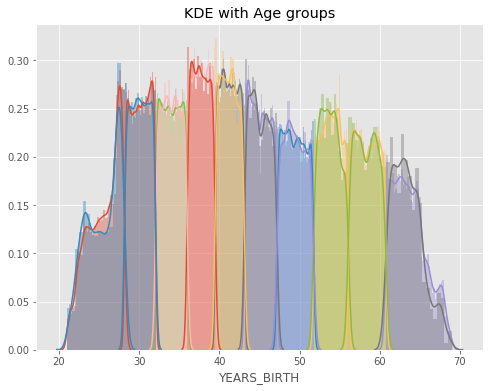

In [65]:
# 繪圖前先排序 / 分組
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

year_group_sorted = age_data.YEARS_GRP.unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_GRP'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_GRP'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

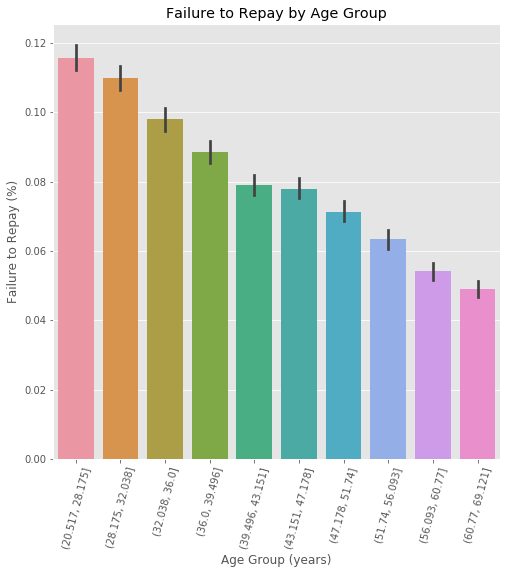

In [66]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
sns.barplot(x="YEARS_GRP", y="TARGET", data= age_data)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');